# Apple Stock Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('/kaggle/input/apple-inc-aapl-stock-data-1980-2024/aapl_us_d.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1984-09-07,0.100763,0.101999,0.099546,0.100763,9.767604e+07
1,1984-09-10,0.100763,0.101071,0.098340,0.100165,7.581254e+07
2,1984-09-11,0.101071,0.103814,0.101071,0.101999,1.787705e+08
3,1984-09-12,0.101999,0.102597,0.098928,0.098928,1.561713e+08
4,1984-09-13,0.104432,0.104730,0.104432,0.104432,2.432310e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


# Exploratory Data Analysis (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10080 non-null  object 
 1   Open    10080 non-null  float64
 2   High    10080 non-null  float64
 3   Low     10080 non-null  float64
 4   Close   10080 non-null  float64
 5   Volume  10080 non-null  float64
dtypes: float64(5), object(1)
memory usage: 472.6+ KB


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


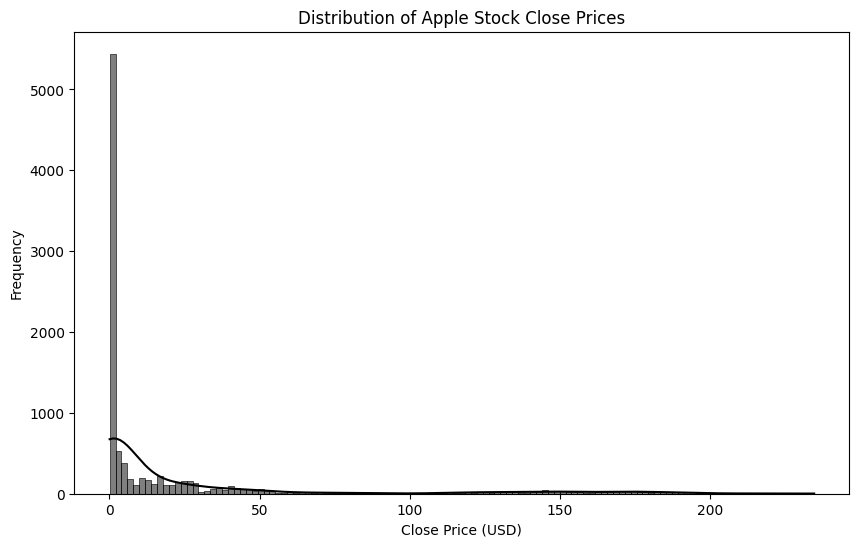

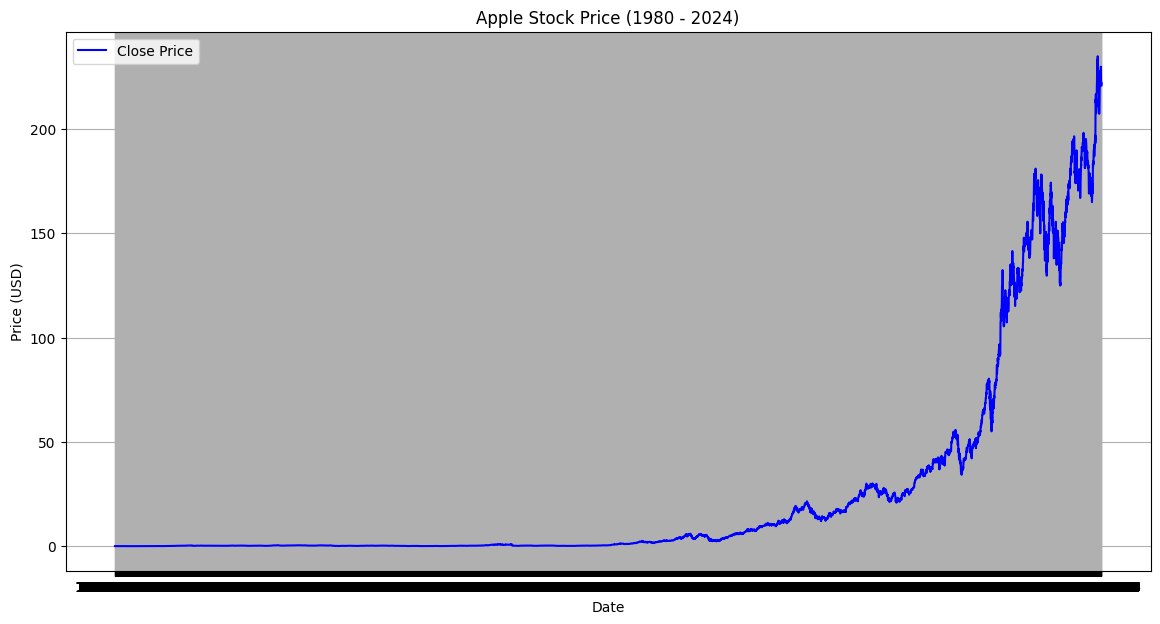

In [5]:
# Displaying the DataFrame information
df.info()

# Displaying descriptive statistics for the DataFrame
df.describe()

# Visualizing the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], kde=True, color='black')
plt.title('Distribution of Apple Stock Close Prices')
plt.xlabel('Close Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Plotting the historical stock price over time
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Price (1980 - 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# Checking for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# Dropping rows with missing values
df_cleaned = df.dropna()

# Verifying that there are no missing values after dropping
print("Missing values after dropping rows with missing values:")
print(df_cleaned.isnull().sum())

# Handling duplicate rows
print(f"Number of duplicate rows before removal: {df_cleaned.duplicated().sum()}")
df_cleaned = df_cleaned.drop_duplicates()
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")

# Resetting index after dropping rows
df_cleaned.reset_index(drop=True, inplace=True)

# Checking data types and converting if necessary (e.g., 'Date' column to datetime)
if df_cleaned['Date'].dtype != 'datetime64[ns]':
    df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])

# Handling outliers in the 'Close' price using IQR method
Q1 = df_cleaned['Close'].quantile(0.25)
Q3 = df_cleaned['Close'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
df_cleaned = df_cleaned[(df_cleaned['Close'] >= lower_bound) & (df_cleaned['Close'] <= upper_bound)]

# Final check of the cleaned data
print("Data overview after cleaning:")
print(df_cleaned.info())
print(df_cleaned.describe())


Missing values before cleaning:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Missing values after dropping rows with missing values:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0
Data overview after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 8814 entries, 0 to 8839
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    8814 non-null   datetime64[ns]
 1   Open    8814 non-null   float64       
 2   High    8814 non-null   float64       
 3   Low     8814 non-null   float64       
 4   Close   8814 non-null   float64       
 5   Volume  8814 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 482.0 KB
None
                                Date         Open         High          Low  \
count                        

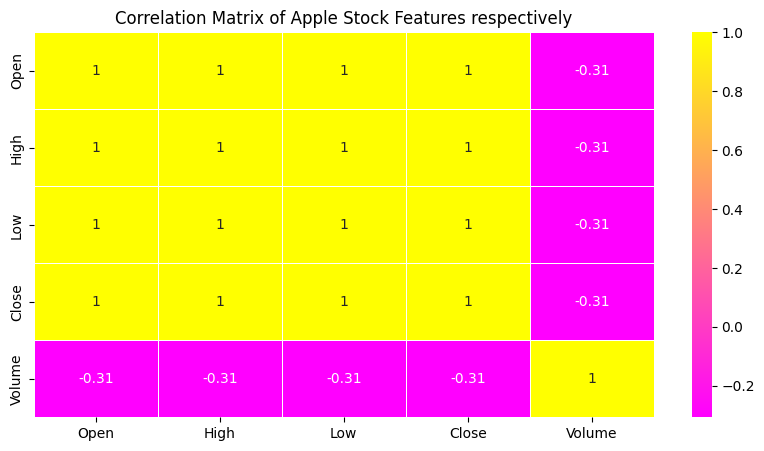

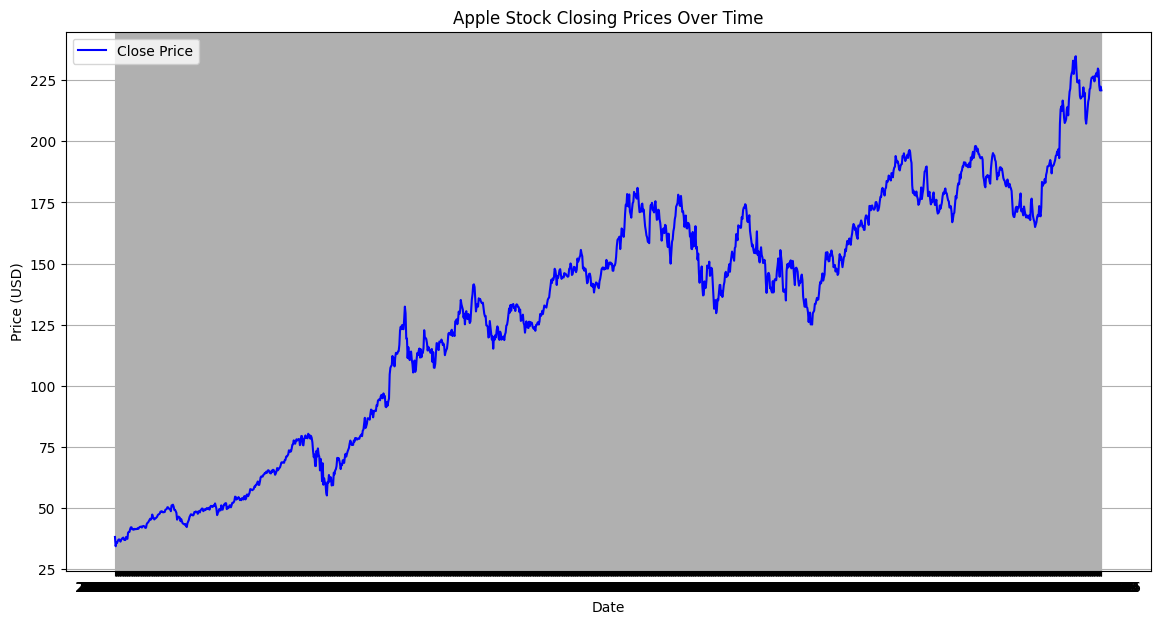

In [7]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming `df` is your DataFrame and `data` is a subset of it

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 5))
correlation_matrix = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='spring', linewidths=0.5)
plt.title('Correlation Matrix of Apple Stock Features respectively')
plt.show()

# Slicing data to focus on a specific date range (e.g., last 5 years)
df_recent = df[df['Date'] > '2019-01-01']

# Plot the closing price over time (blue line)
plt.figure(figsize=(14, 7))
plt.plot(df_recent['Date'], df_recent['Close'], label='Close Price', color='blue')
plt.title('Apple Stock Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


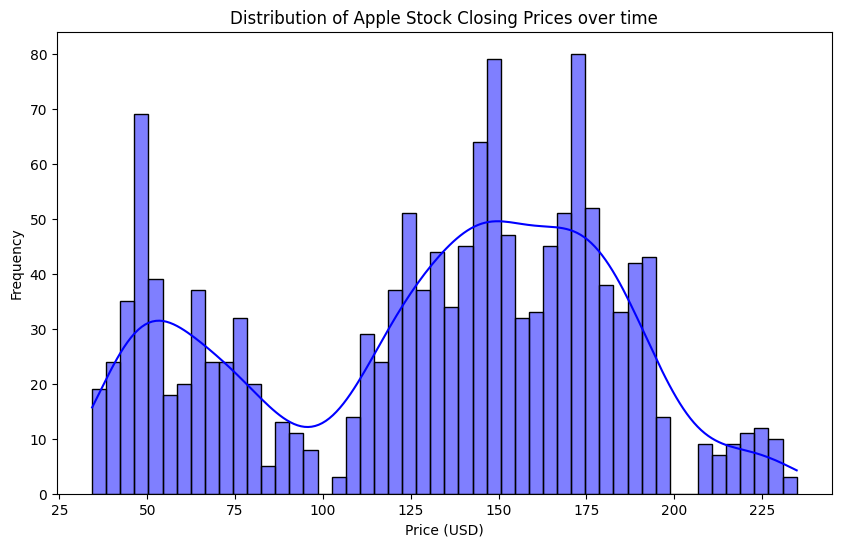

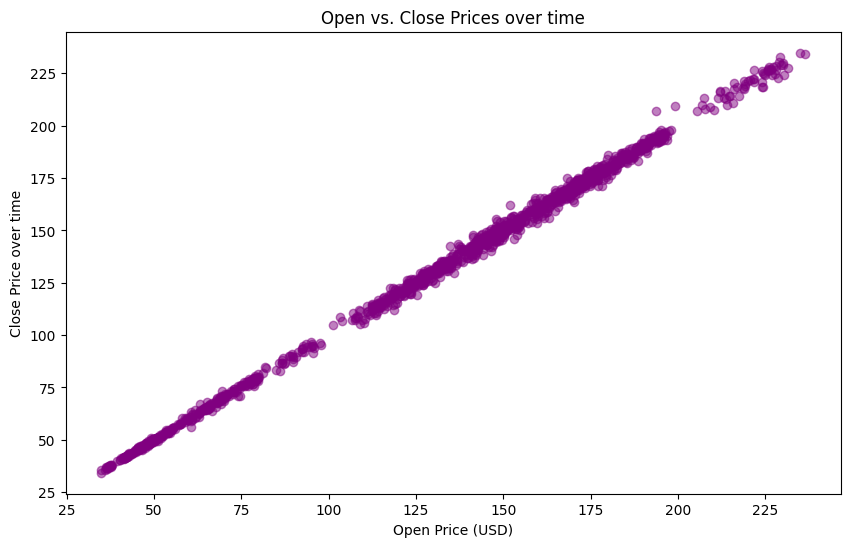

In [8]:
# Plot the distribution of the closing prices (green histogram with mako palette)
plt.figure(figsize=(10, 6))
sns.histplot(df_recent['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Apple Stock Closing Prices over time')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

# Visualize the relationship between Open and Close prices (orange scatter plot)
plt.figure(figsize=(10, 6))
plt.scatter(df_recent['Open'], df_recent['Close'], alpha=0.5, color='purple')
plt.title('Open vs. Close Prices over time')
plt.xlabel('Open Price (USD)')
plt.ylabel('Close Price over time')
plt.show()


<ipython-input-9-07d7f6be9a57>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_recent['Daily Return'] = df_recent['Close'].fillna(method='ffill').pct_change()
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


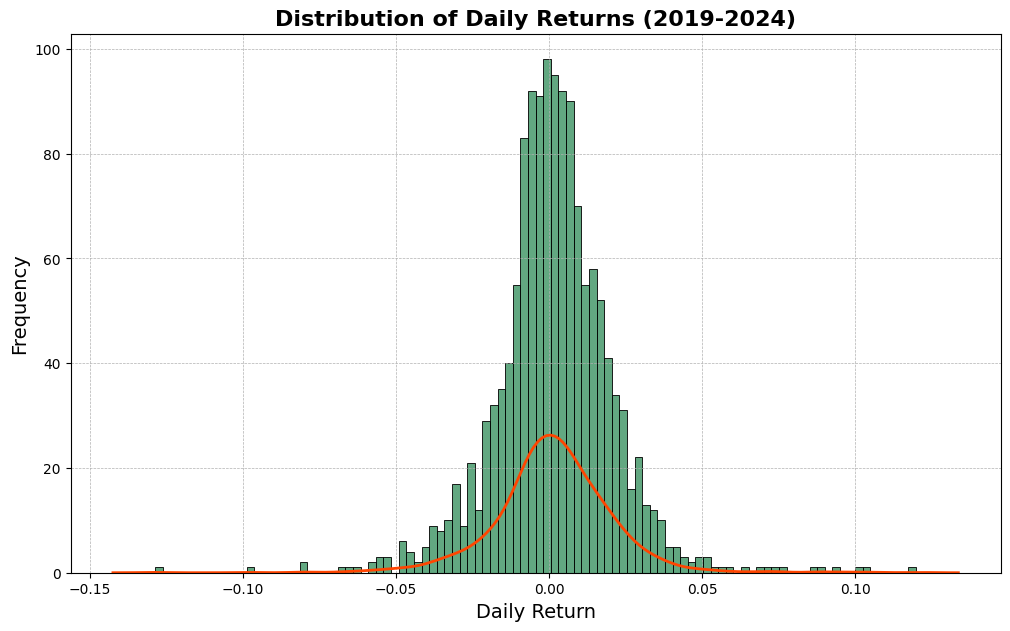

In [9]:
# Calculate Daily Returns
df_recent = df_recent[df_recent['Close'].between(df_recent['Close'].quantile(0.01), df_recent['Close'].quantile(0.99))]
df_recent['Daily Return'] = df_recent['Close'].fillna(method='ffill').pct_change()

# Create the histogram to visualize the distribution of daily returns
plt.figure(figsize=(12, 7))

# Using seaborn's histplot for the histogram with a different color and style
sns.histplot(df_recent['Daily Return'].dropna(), bins=100, color='#2E8B57', kde=False)

# Adding KDE (Kernel Density Estimate) with customized styling
sns.kdeplot(df_recent['Daily Return'].dropna(), color='#FF4500', linewidth=2)

# Enhancing the plot's title and labels
plt.title('Distribution of Daily Returns (2019-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Daily Return', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding a grid with custom styling for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()



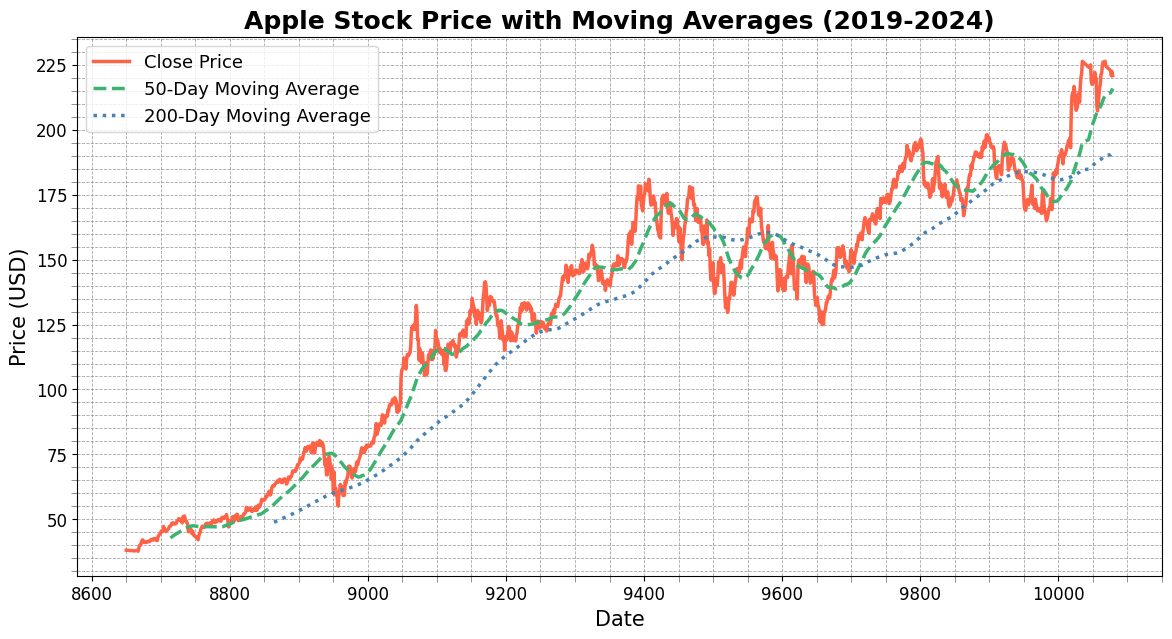

In [10]:
# Calculate the 50-Day and 200-Day Moving Averages
df_recent['MA50'] = df_recent['Close'].rolling(window=50).mean()
df_recent['MA200'] = df_recent['Close'].rolling(window=200).mean()

# Plot the moving averages and closing prices with enhanced visuals
plt.figure(figsize=(14, 7))

# Plot the Close Price with a gradient-like color and thicker line for better visibility
plt.plot(df_recent['Close'], label='Close Price', color='#FF6347', linewidth=2.5)

# Plot the 50-Day Moving Average with a dashed line style and thicker line
plt.plot(df_recent['MA50'], label='50-Day Moving Average', color='#3CB371', linestyle='--', linewidth=2.5)

# Plot the 200-Day Moving Average with a dotted line style and even thicker line
plt.plot(df_recent['MA200'], label='200-Day Moving Average', color='#4682B4', linestyle=':', linewidth=2.5)

# Enhancing the title with a slightly larger font size and font weight
plt.title('Apple Stock Price with Moving Averages (2019-2024)', fontsize=18, fontweight='bold')

# Customizing the axis labels with consistent styling
plt.xlabel('Date', fontsize=15)
plt.ylabel('Price (USD)', fontsize=15)

# Fine-tuning the legend's location and font size for clarity
plt.legend(loc='best', fontsize=13)

# Adding a more refined grid with custom styling for both major and minor ticks
plt.grid(True, which='both', linestyle='--', linewidth=0.6, color='gray', alpha=0.7)

# Adding minor ticks for better precision
plt.minorticks_on()

# Customizing the appearance of major and minor ticks
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='minor', length=4, color='gray')

# Display the plot
plt.show()


In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [12]:
df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=10).std()
df.dropna(inplace=True)  # Drop rows with NaN values

In [13]:
features = ['50_MA', '200_MA', 'Returns', 'Volatility']
target = 'Close'
X = df[features]
y = df[target]

### Train/Test Split:

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Choosing a Model:

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


### Evaluate Performance:

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


MAE: 1.481819383000228
MSE: 12.302455365118814


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [19]:
y_pred = model.predict(X_test_scaled)


In [20]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'R-squared Score (R²): {r2:.4f}')


Mean Squared Error (MSE): 1.3066
R-squared Score (R²): 0.9994


In [21]:
# Using the most recent values from your dataset
future_50_MA = df['50_MA'].iloc[-1]
future_200_MA = df['200_MA'].iloc[-1]
future_returns = df['Returns'].iloc[-1]
future_volatility = df['Volatility'].iloc[-1]

future_data = {
    '50_MA': [future_50_MA],  # Replace with actual future values
    '200_MA': [future_200_MA],
    'Returns': [future_returns],
    'Volatility': [future_volatility]
}
future_df = pd.DataFrame(future_data)
future_df_scaled = scaler.transform(future_df)


In [22]:
future_price = model.predict(future_df_scaled)
print(f'Predicted Future Price: {future_price[0]:.2f}')


Predicted Future Price: 221.53


### Full Safe Prediction Code

In [23]:
import numpy as np

# Ensure no NaN values in future data
if np.isnan(future_df_scaled).any():
    raise ValueError("Error: NaN values detected in scaled future data.")

# Predict future price
future_price = model.predict(future_df_scaled)

# Print prediction
print(f'Predicted Future Price: {future_price[0]:.2f}')


Predicted Future Price: 221.53


### Predicted Visualization Code

In [24]:
import pandas as pd

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Set as index if not already
df.set_index('Date', inplace=True)

# Check for invalid dates
print(df.index.min(), df.index.max())  # This should show actual date ranges, not 1970-01-01


1985-06-21 00:00:00 2024-09-06 00:00:00


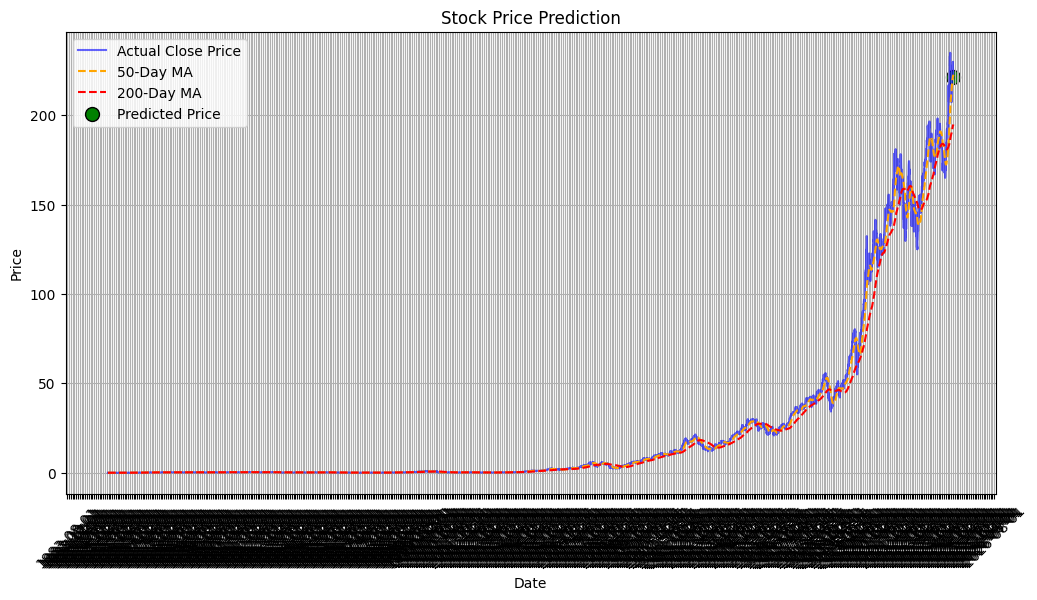

In [25]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price', color='blue', alpha=0.6)
plt.plot(df.index, df['50_MA'], label='50-Day MA', linestyle='dashed', color='orange')
plt.plot(df.index, df['200_MA'], label='200-Day MA', linestyle='dashed', color='red')

# Future prediction
future_date = df.index[-1] + pd.DateOffset(1)
plt.scatter(future_date, future_price, color='green', label='Predicted Price', s=100, edgecolors='black')

# Fix x-axis format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


### Plot Actual vs. Predicted Prices

In [26]:
print(df.columns)


Index(['Open', 'High', 'Low', 'Close', 'Volume', '50_MA', '200_MA', 'Returns',
       'Volatility'],
      dtype='object')


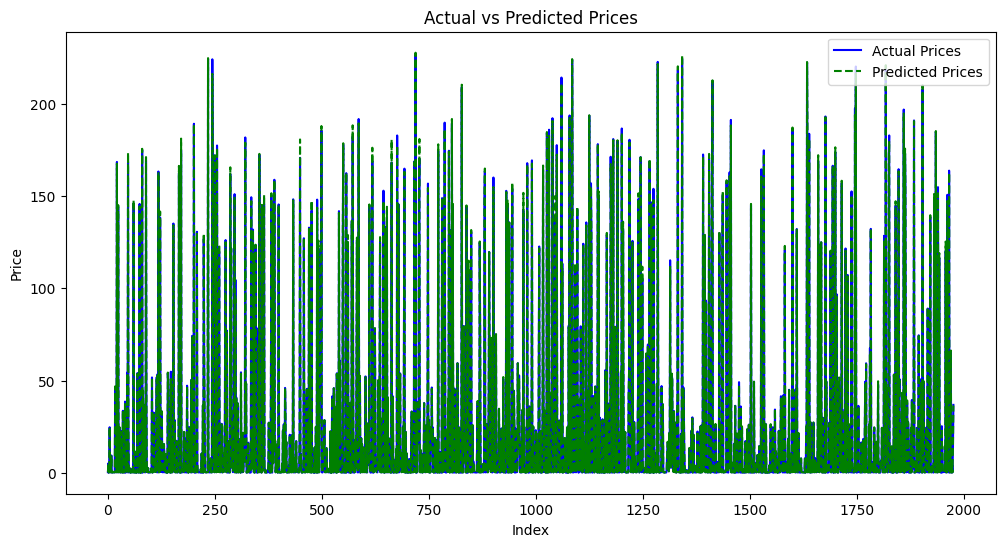

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure both y_test and y_pred are 1D
y_test = y_test.flatten() if hasattr(y_test, "flatten") else np.array(y_test)
y_pred = y_pred.flatten() if hasattr(y_pred, "flatten") else np.array(y_pred)

# Ensure they have the same length
if len(y_test) != len(y_pred):
    print(f"Length mismatch! y_test: {len(y_test)}, y_pred: {len(y_pred)}")
    y_pred = y_pred[:len(y_test)]  # Trim if needed

# Convert to DataFrame
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}).reset_index(drop=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(results['Actual'], label='Actual Prices', color='blue')
plt.plot(results['Predicted'], label='Predicted Prices', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()
